In [ ]:
#Chapter3- Building deep learning models with keras
#1-Understanding your data
'''
Question: Of the 9 predictor variables in the DataFrame, how many are binary indicators?
The min and max values as shown by .describe() will be informative here. How many binary indicator predictors are there?

Answer: There are 6 binary indicators: union, female, marr, south,manufacturing and construction
'''


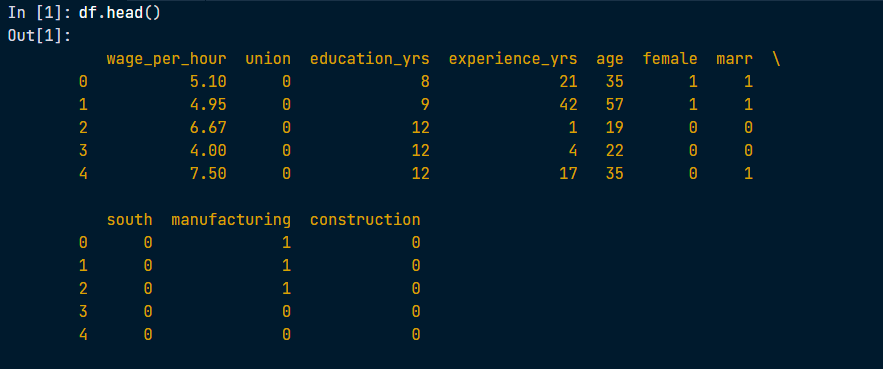

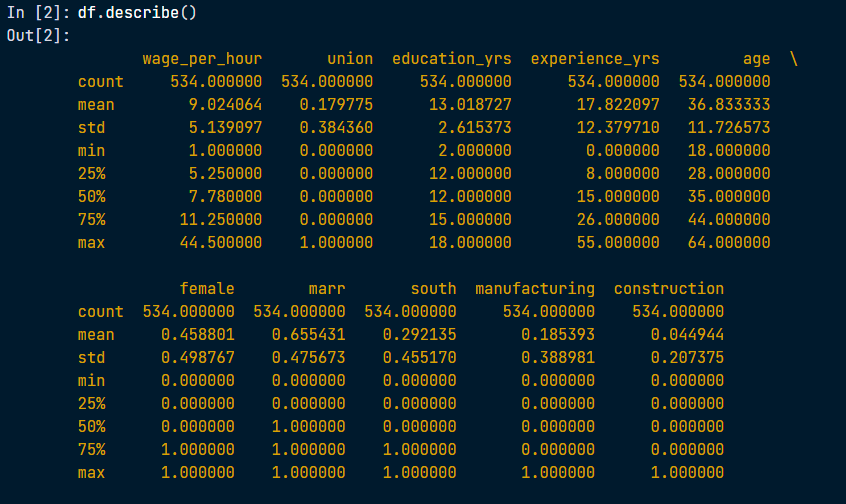

In [ ]:
#2-Specifying a model
#Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation="relu", input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation="relu"))

# Add the output layer
model.add(Dense(1))

In [ ]:
#3-Compiling the model
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

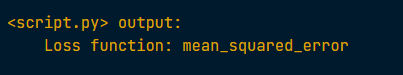

In [ ]:
#4-Fitting the model
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors,target)

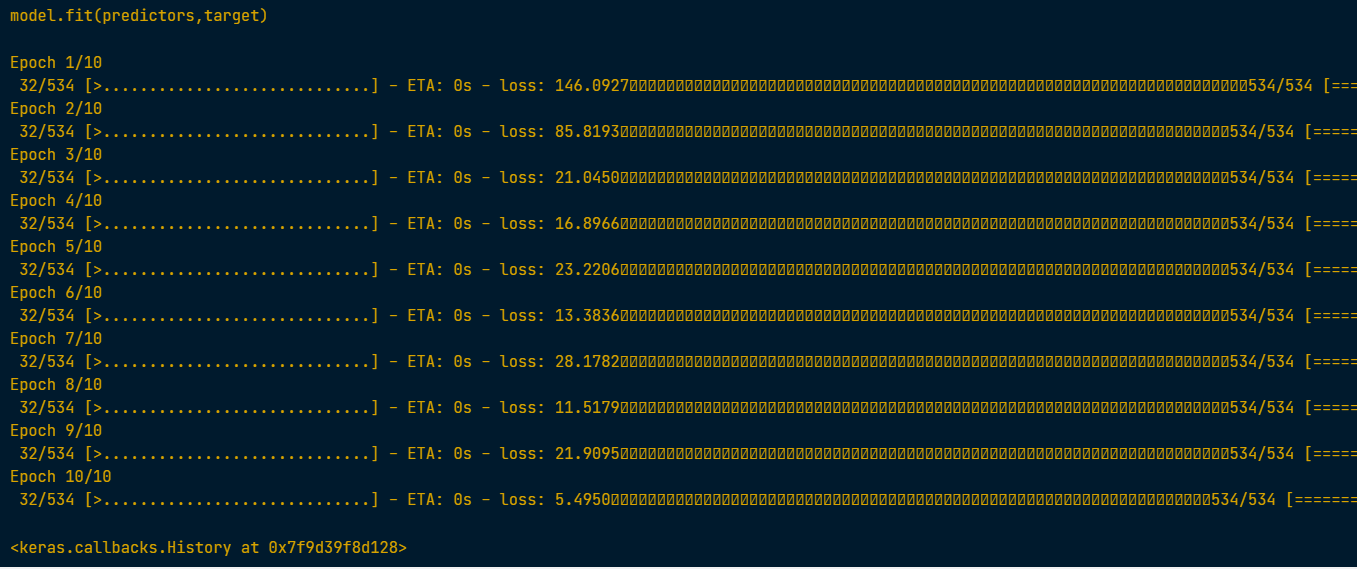

In [ ]:
#5- Understanding your classification data
'''
Question: It's smart to review the maximum and minimum values of each variable 
to ensure the data isn't misformatted or corrupted. 
What was the maximum age of passengers on the Titanic?

Answer: The maximum age of passengers on the Titanic is 80. The answer is highlighted below in green. 
'''


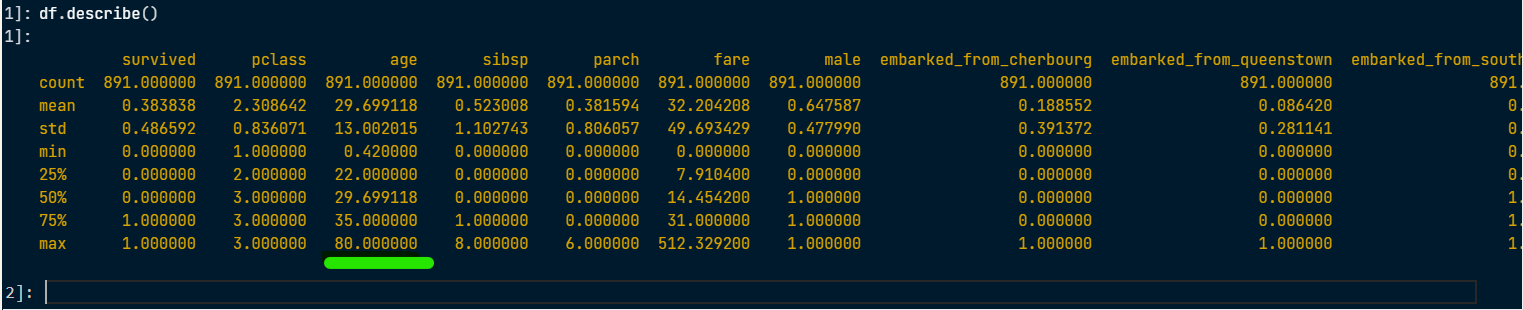

In [ ]:
#6-Last steps in classification models
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32,activation= "relu", input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation="softmax"))

# Compile the model
model.compile(optimizer ="sgd",loss="categorical_crossentropy",metrics=["accuracy"])

# Fit the model
model.fit(predictors,target)

# This simple model is generating an accuracy of 68


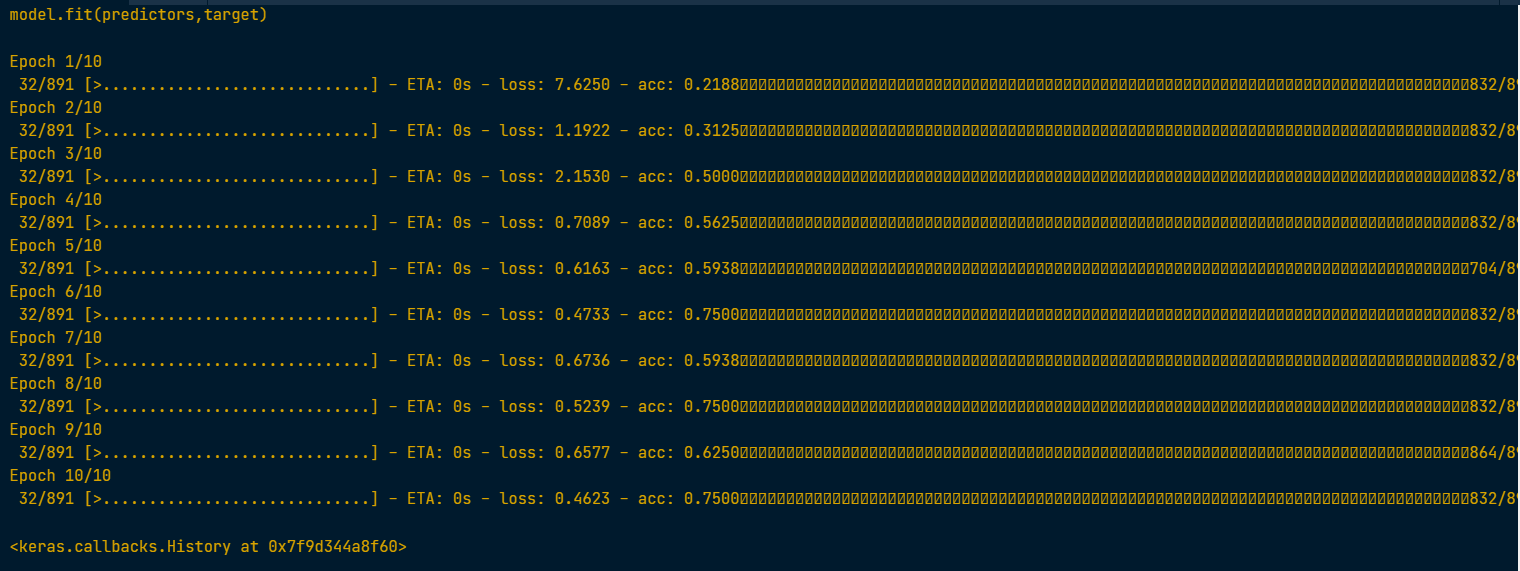

In [ ]:
#7- Making predictions
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

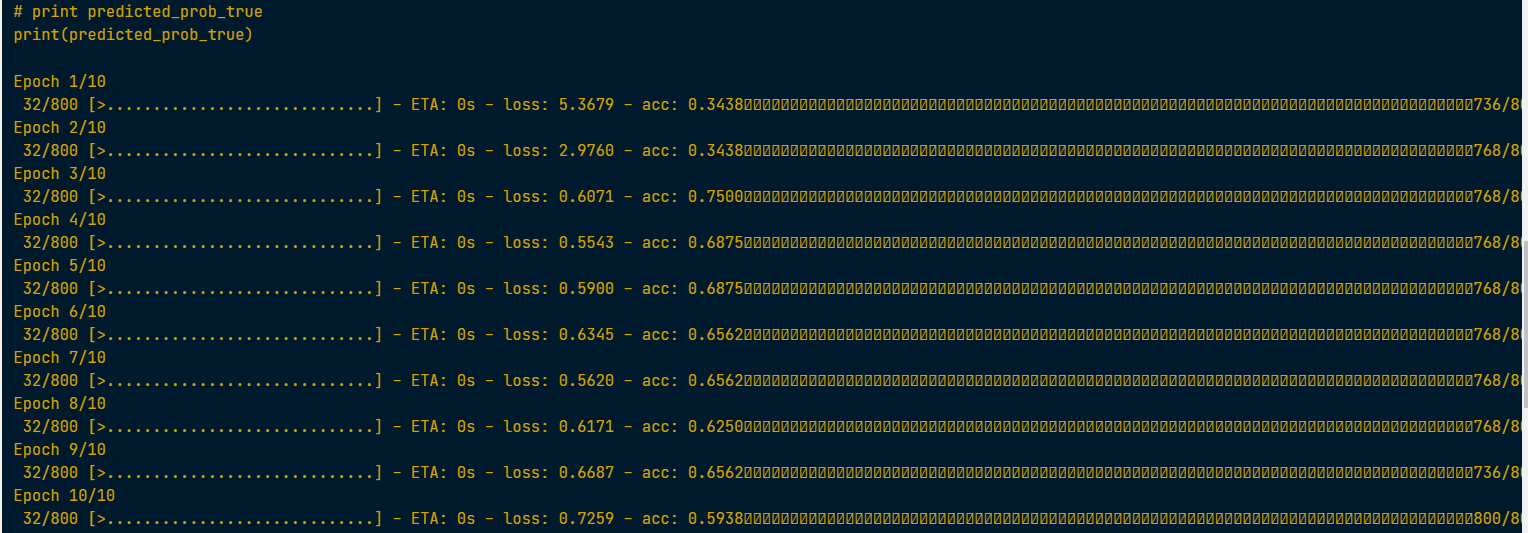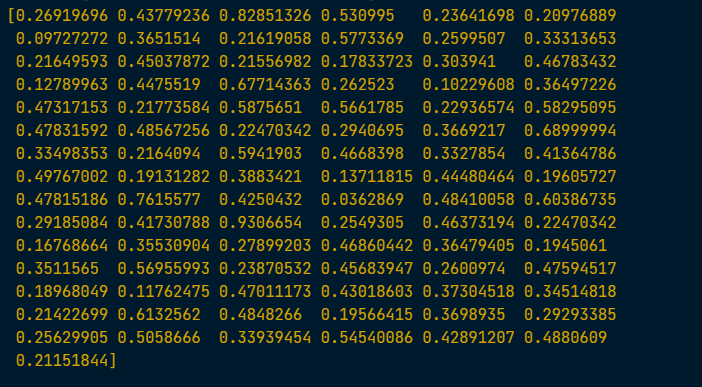

In [ ]:
#Chapter 4: Fine-tuning keras models
#1- Diagnosing optimization problems
'''
Question: Which of the following could prevent a model from showing an improved loss in its first few epochs?
Answer: All the options listed: Learning rate too low, Learning rate too high, and Poor choice of activation function,
         could prevent a model from showing an improved loss in its first few epochs.'
'''


In [ ]:
#2- Changing optimization parameters
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001,0.01,1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer,loss="categorical_crossentropy")
    
    # Fit the model
    model.fit(predictors,target)
    

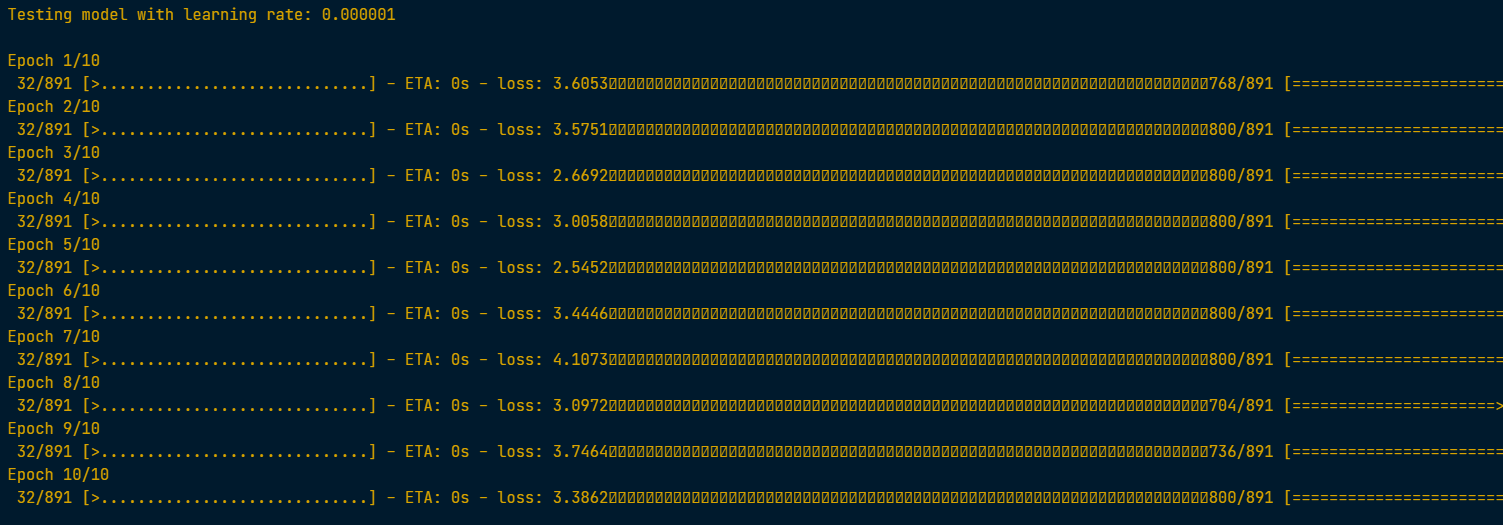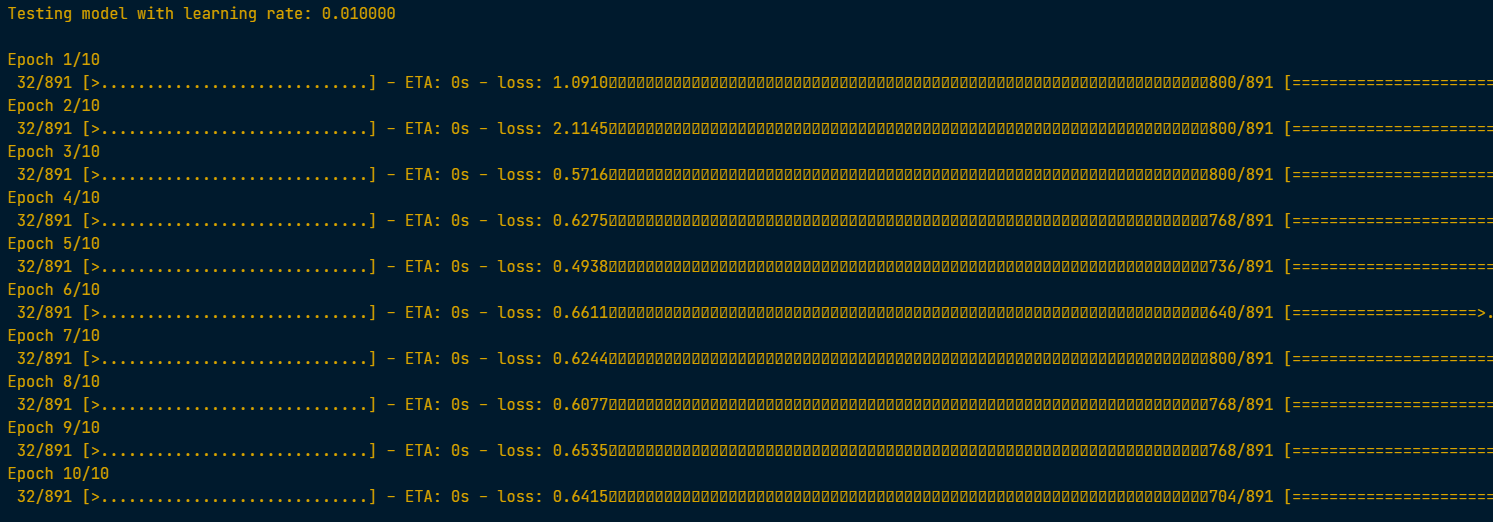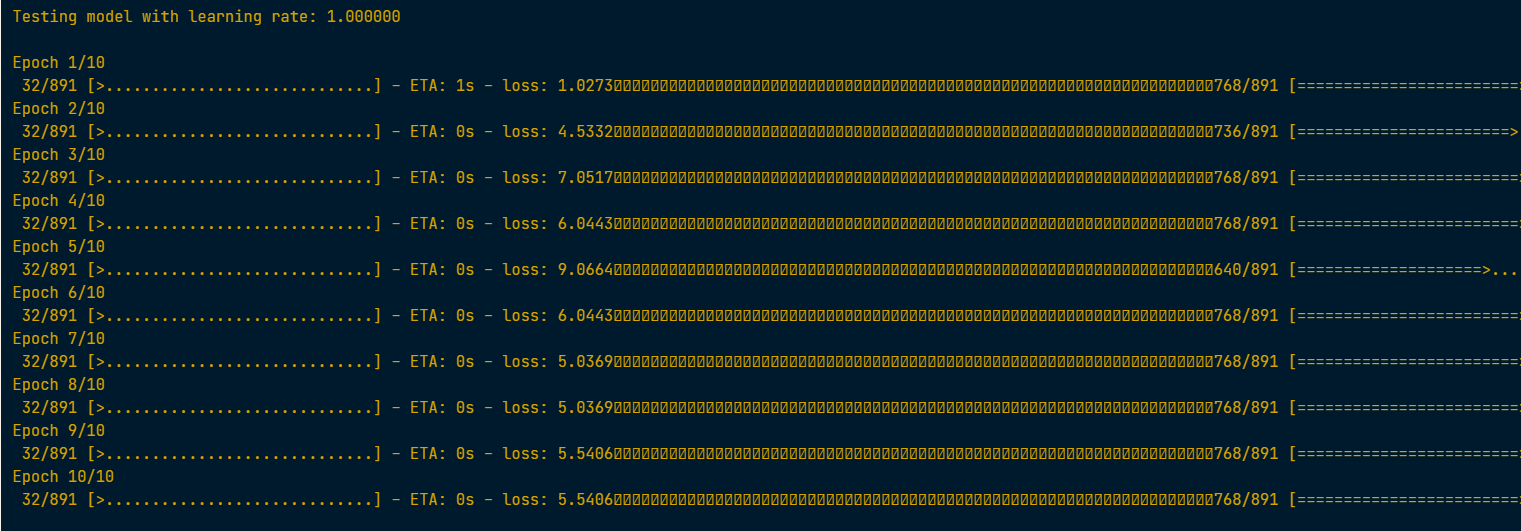

In [ ]:
#3-Evaluating model accuracy on validation dataset
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors,target,validation_split=0.3)


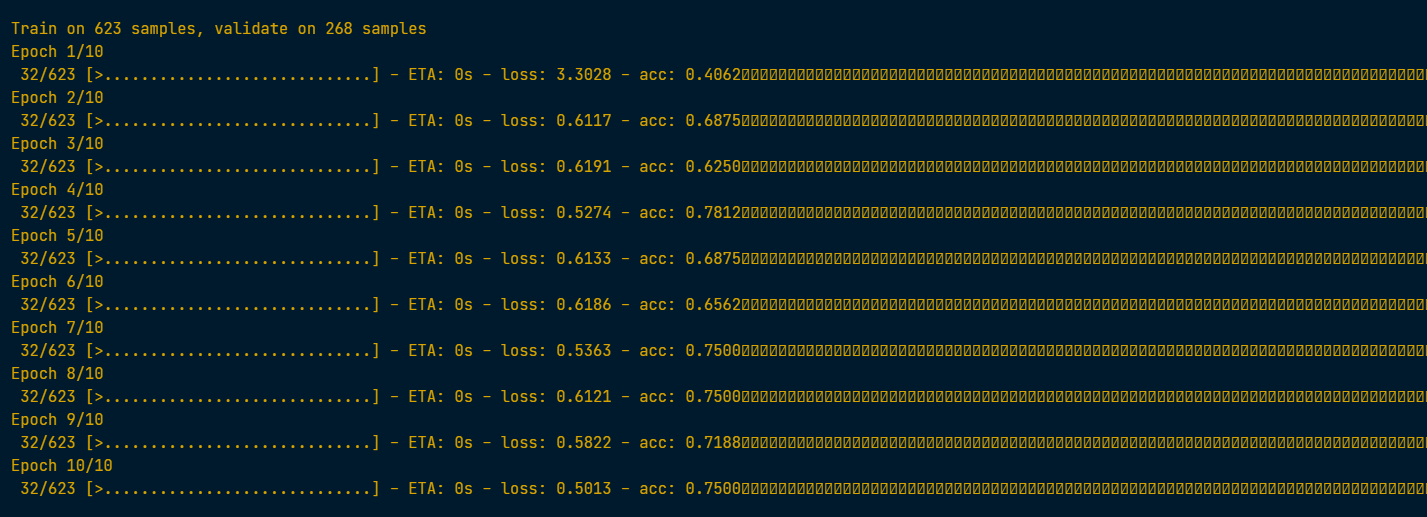

In [ ]:
#4-Early stopping: Optimizing the optimization
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors,target,validation_split=0.3, epochs=30,
callbacks = [early_stopping_monitor])

#It seems like the optimization stopped after 7 epochs.



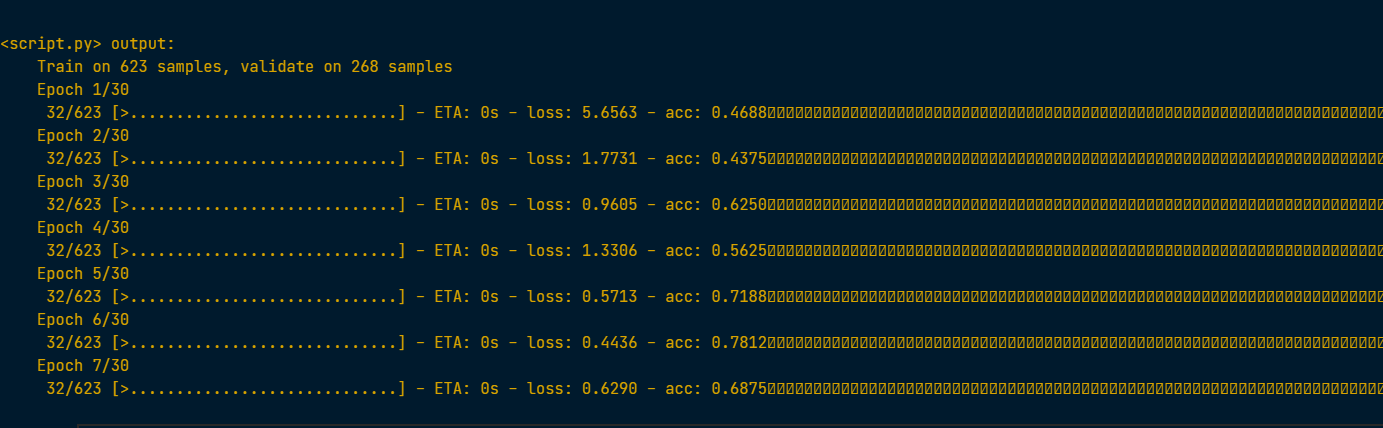

In [ ]:
#5- Experimenting with wider networks
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation="relu", input_shape=input_shape))
model_2.add(Dense(100,activation="relu"))

# Add the output layer
model_2.add(Dense(2, activation="softmax"))

# Compile model_2
model_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

#The blue model is the one we made, the red is the original model. 
#Our model has a lower loss value, so it is the better model.


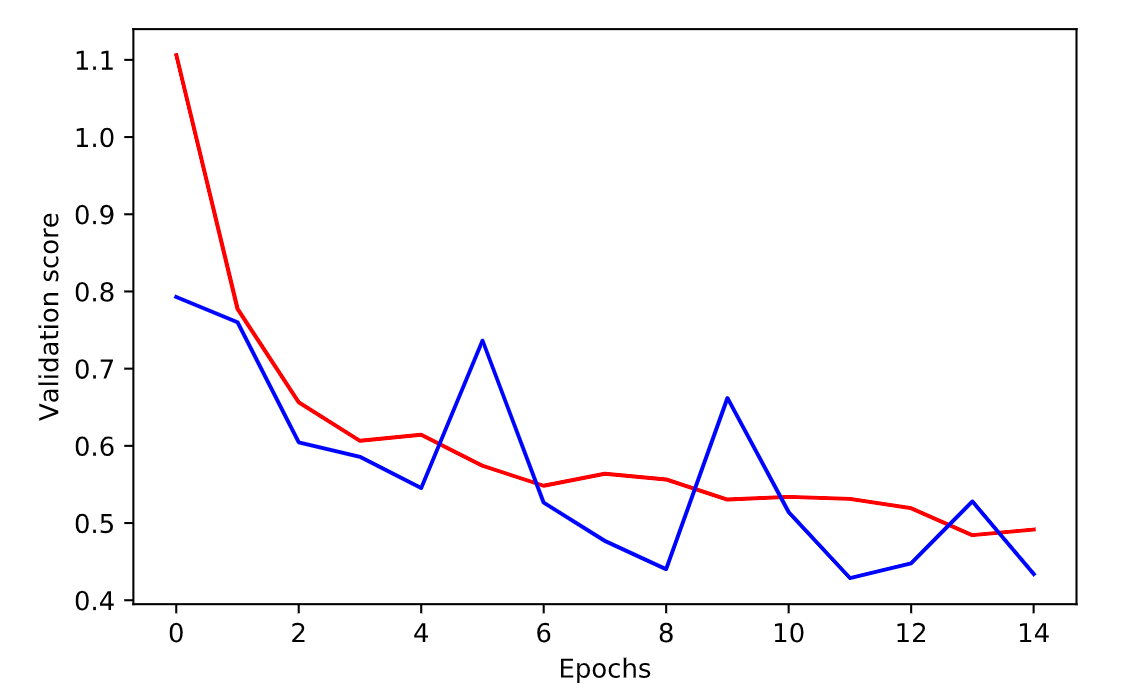

In [ ]:
#6- Adding layers to a network
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation="relu", input_shape=input_shape))
model_2.add(Dense(50,activation="relu"))
model_2.add(Dense(50,activation="relu"))
# Add the output layer
model_2.add(Dense(2,activation="softmax"))

# Compile model_2
model_2.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()
#The blue model is the one we made and the red is the original model.

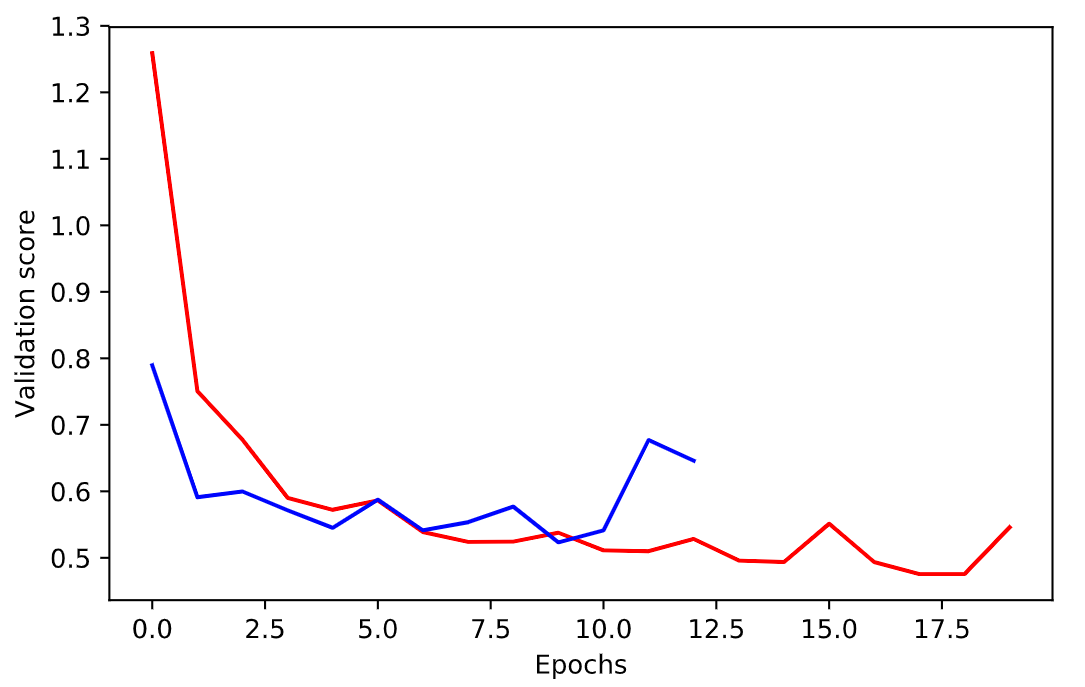

In [ ]:
#7-Experimenting with model structures
'''
Question:
You've just run an experiment where you compared two networks that were identical except that
the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance.
Given that, which of the following would be a good experiment to run next for even better performance?

Answer: Use more units in each hidden layer.
'''

In [ ]:
#8-Building your own digit recognition model
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation="relu",input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50,activation="relu"))

# Add the output layer
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

# Fit the model
model.fit(X,y,validation_split=0.3)


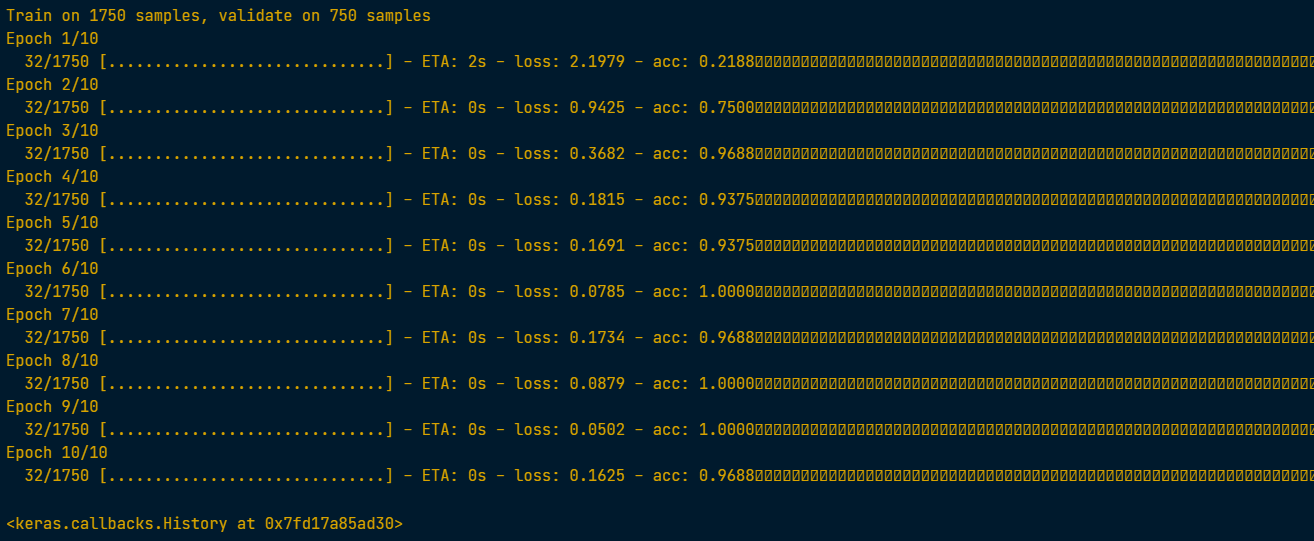